#### 定义
**线性判定分析**
（Linear Discriminant Analysis，LDA也称Fisher判定分析），是一种有监督的降维方法。

#### 主要思想

给定训练样例集，设法将样例投影到一条直线上，使得同类样例的投影尽可能近，异类样例的投影尽可能远。

#### 方法

**最小化类内方差，最大化类间均值**

输入：数据集$D=\{(\boldsymbol {x}_{i},y_{i})\}_{i=1}^{m}$，$y_{i}∈\{C_{1},C_{2},... ,C_{k}\}$，其中任意样本 $\boldsymbol {x}_{i}$ 为n维向量

输出：降维后的样本集$D^{′}$

**算法步骤**：
1. 计算类内散度矩阵$S_{w}$和类间散度矩阵$S_{b}$
2. 计算矩阵 $S_{b}S_{b}$
3. 计算$S_{w}^{-1}S_{b}$ 的 n 个最大非零广义特征值所对应的
   特征向量组成的矩阵$W$, n ≤ N-1 
4. 使用矩阵$W$将样本映射到新的特征子空间 (在二分类上, 则投影方向为$W$)
   

In [130]:
from sklearn.datasets import load_iris # 暂时用于测试
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
'''
    算法步骤：
    1. 计算类内散度矩阵Sw和类间散度矩阵Sb
    2. 计算矩阵 Sw.I @ Sb
    3. 计算Sw.I @ Sb 的 n 个最大非零广义特征值所对应的
       特征向量组成的矩阵W, n ≤ N-1 
    4. 使用矩阵W将样本映射到新的特征子空间 (在二分类上, 则投影方向为W)
'''
class FisherDiscriminantAnalysis():

    def __init__(
        self,
        data:np.ndarray,
        target:np.ndarray,
        n_class=2,              # 默认为二分类线性判定
        solver='svd',           # 默认为 svd，solver={'svd', 'lsqr', 'eigen'}，#### 这里没用上...
        ):
        self.data = data
        self.target = target           
        self.n_class = n_class
        self.solver = solver
    
    def svd(self, X, y):
        return np.linalg.svd(X, y); # 哈哈,具体算法再看看，这个真肝不动了


    # 返回 Sw.I@Sb 的 n 个最大非零广义特征值所对应特征向量组成的矩阵W
    def train(self, Sw, Sb):
        S = Sw.I @ Sb
        eigValues,eigVectors = np.linalg.eig(S) # 求 Sw.I@Sb 的特征值和特征向量 
        eigValInd = np.argsort(eigValues)
        eigValInd = eigValInd[:(-self.n_class-1):-1]
        w = eigVectors[:,eigValInd]
        data_ndim = self.data @ w
        return data_ndim


    # 计算类内散度矩阵
    def WithinClassScatterMatrix(self):
        Sw = np.zeros((self.data.shape[1],self.data.shape[1])) # 创建一个 N×N 空矩阵
        for i in np.unique(self.target):
            datai = self.data[self.target == i] # 第 i 个类别的所有示例
            datai = datai-datai.mean(0) 
            Swi = np.mat(datai).T*np.mat(datai)
            Sw += Swi
        return Sw

     # 计算类间散度矩阵 
    def BetweenClassScatterMaxtrix(self):
        Sb = np.zeros((self.data.shape[1],self.data.shape[1])) # 创建一个 N×N 空矩阵
        u = self.data.mean(0)    # 所有示例的均值
        # 遍历每个类别，计算得类间散度矩阵
        for i in np.unique(self.target):
            mi = self.data[self.target == i].shape[0]
            ui = self.data[self.target == i].mean(0) # 第 i 个类别的示例均值
            Sbi = mi*np.mat(ui - u).T @ np.mat(ui - u) # 第 i 个类别的类间散度矩阵
            Sb += Sbi 
        return Sb

#### 测试

使用**skicit-learn**的莺尾花数据集进行测试，并和**skicit-learn**机器学习库中的线性判定算法进行比较

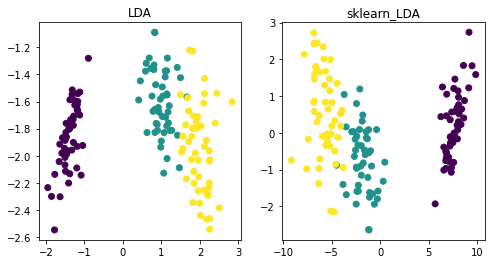

In [131]:
# if __name__ == 'main':
iris_datas = load_iris()
x = iris_datas.data
Y = iris_datas.target
LDA =  FisherDiscriminantAnalysis(x,Y,2)
Sw = LDA.WithinClassScatterMatrix()
Sb = LDA.BetweenClassScatterMaxtrix()
my_train_data = LDA.train(np.mat(Sw), np.mat(Sb))
my_train_data = np.array(my_train_data) # 训练后的数据矩阵需要转换为数组
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("LDA")
plt.scatter(my_train_data[:, 0], my_train_data[:, 1], c = Y)

# 与skicit-learn机器学习库中的 LinearDiscriminantAnalysis算法对比
sk_data = LinearDiscriminantAnalysis(n_components=2).fit_transform(x, Y)
plt.subplot(122)
plt.title("sklearn_LDA")
plt.scatter(sk_data[:, 0], sk_data[:, 1], c = Y)
plt.savefig("LDA.png",dpi=600)
plt.show()

#### 数据集

能找到的可以使用于LDA的相关电力数据有点难找。。。
暂时先用`玻璃分类`的数据来实现。好像泛化能力还不行。。。四个以上的类别就开始错乱了，后续继续改进！

**来源：**[Glass Classification | Kaggle](https://www.kaggle.com/datasets/uciml/glass)

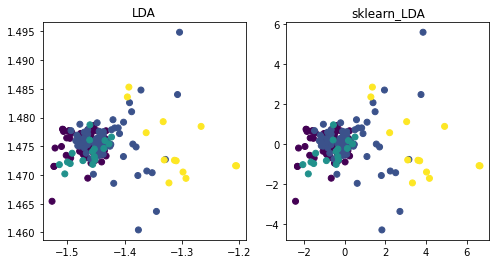

In [132]:

import time
import pandas as pd
import numpy as np
time_1 = time.time()
glass_data = pd.read_csv('../datasets/glass.csv')
# print(glass_data.drop('Fe',axis=1))
x = glass_data[['RI','Na','Mg','Al']]
Y = glass_data[['Type']]
x = np.array(x)
Y = np.array(Y)
Y = Y.flatten() # 将数组转为一维数组
# print('x:\n',type(x),x)
# print('\nY:\n',type(Y),Y)
LDA =  FisherDiscriminantAnalysis(x,Y,2)
Sw = LDA.WithinClassScatterMatrix()
Sb = LDA.BetweenClassScatterMaxtrix()
my_train_data = LDA.train(np.mat(Sw), np.mat(Sb))
my_train_data = np.array(my_train_data) # 训练后的数据矩阵需要转换为数组
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("LDA")
plt.scatter(my_train_data[:, 0], my_train_data[:, 1], c = Y)

# 与skicit-learn机器学习库中的 LinearDiscriminantAnalysis算法对比
sk_data = LinearDiscriminantAnalysis(n_components=2).fit_transform(x, Y)
plt.subplot(122)
plt.title("sklearn_LDA")
plt.scatter(sk_data[:, 0], sk_data[:, 1], c = Y)
# plt.savefig("LDA.png",dpi=600)
plt.show()
